In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# import pandas as pd
# import datetime as dt
# from IPython.display import display, Markdown, Latex
# import numpy as np

# import glob
# frac = 0.01
# # path ='./data/RFReg_' # use your path
# path ='./../data/Pobreza/pobreza_' # use your path

# allFiles = []
# allFiles += glob.glob(path+str(frac)+'_q*.csv')
# allFiles = sorted(allFiles)
# allFiles

In [3]:
## Set up G Sheets connection

In [4]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread
from numpy import array, nan

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
# credentials = ServiceAccountCredentials.from_json_keyfile_name(
#          './../../../Desktop/newgsheets-349817-e11b8c6a66ec.json', scope) # Your json file here
credentials = ServiceAccountCredentials.from_json_keyfile_name(
         './../../../Desktop/newgsheets-349817-e11b8c6a66ec.json', scope) # Your json file here
gc = gspread.authorize(credentials)


In [5]:
### Informacion indice de Precios

In [6]:
# cpi_M = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_M.csv', index_col=0)
# cpi_M.index = pd.to_datetime(cpi_M.index)

# cpi_Q = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_Q.csv', index_col=0)
# cpi_Q.index = pd.to_datetime(cpi_Q.index)

# cpi_actual = cpi_M.loc['2022-06']['index'][0]
# cpi_2010Q4 = cpi_Q.loc['2010-11']['index'][0]
# cpi_ref = cpi_M.loc['2016-01']['index'][0]

In [7]:
## INDICE DE PRECIOS - CONVERSION A VALOR CONSTANTE

cpi_M = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_M.csv', index_col=0)
cpi_M.index = pd.to_datetime(cpi_M.index)

from datetime import datetime as dt
  
# Getting current date and time
today = dt.today()
ref = '2016-01'

cpi_actual = cpi_M.loc[today.strftime("%Y-%m")]['index'][0]
cpi_ref = cpi_M.loc[ref]['index'][0]

# df_ARShoy = df*(cpi_actual/cpi_ref)

cpi_Q = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_Q.csv', index_col=0)
cpi_Q.index = pd.to_datetime(cpi_Q.index)
cpi_2010Q4 = cpi_Q.loc['2010-11']['index'][0]


In [8]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')


In [9]:
## Ultimo trimestre 2010

f = './../data/Pobreza/pobreza_0.01_q2010-11-15.csv'
groupers = ['AGLOMERADO', 'PROV', 'NOMPROV']
vars_ = ['INGRESO', 'P47T_persona']

data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
data = data.merge(aglo_labels)
data['AGLO_si'] = data.AGLOMERADO != 0
data['Total'] = True

data = data.loc[data.AGLO_si == 1]

data.loc[data.INGRESO == 0, 'decil_P47T'] = 'sin ingresos'
data.loc[data.INGRESO == 1, 'P47T_persona'] = data.loc[data.INGRESO == 1, 'P47T_persona'] + np.random.uniform(0, .01, data.INGRESO.sum())
data.loc[data.INGRESO == 1, 'decil_P47T'] = pd.qcut(data.loc[data.INGRESO == 1, 'P47T_persona'], q = 10, labels = range(1, 11))

data['Q'] = pd.to_datetime(data['Q'])
# df104 = df.loc[df.Q == '2010-11-15']

In [10]:
## Tabla:

# Personas con ingresos (aprox 14.377, sin ingresos 10.510 para un total de 24.887 en aglos)


In [11]:
tabla = data.groupby(['decil_P47T']).agg({'P47T_persona': ['min', 'max', 'size', 'sum', 'mean']})['P47T_persona']
tabla[['min', 'max', 'sum', 'mean']] = tabla[['min', 'max', 'sum', 'mean']]*(cpi_2010Q4/cpi_ref)
tabla[['size', 'sum']] = 100*tabla[['size', 'sum']]
tabla['pct'] = 100*tabla['sum']/tabla['sum'].sum()
tabla.loc['Total'] = tabla.iloc[:-1].agg({'min': 'min', 'max': 'max','size': 'sum', 'sum': 'sum', 'mean': 'mean', 'pct': 'sum'})

tabla[['min', 'max', 'sum', 'mean']] = tabla[['min', 'max', 'sum', 'mean']].round(-1).astype(int)
tabla['size'] = (tabla['size']/1e3).round(1)
tabla['sum'] = (tabla['sum']/1e6).round(1)
tabla['pct'] = tabla['pct'].round(1)
tabla.columns = ['Mínimo', 'Máximo', 'Población (miles)', 'Ingresos (mill. ARS)', 'Media', '% de suma de ingresos']
tabla

,Mínimo,Máximo,Población (miles),Ingresos (mill. ARS),Media,% de suma de ingresos
decil_P47T,,,,,,
1,30,500,1555.1,510.8,330,1.4
2,500,800,1555.0,1043.1,670,2.8
3,800,1040,1555.0,1460.6,940,3.9
4,1040,1400,1555.0,1858.6,1200,5.0
5,1400,1750,1555.1,2401.4,1540,6.5
6,1750,2020,1555.0,3002.4,1930,8.1
7,2030,2690,1555.0,3747.4,2410,10.1
8,2690,3490,1555.0,4720.4,3040,12.7
9,3490,4990,1555.0,6409.4,4120,17.2


In [12]:
sheet_id = '1mtdjdJ_bdvPSP3ojl8bc267A8eYsELRKM16TZjARUSY'
sh = gc.open_by_key(sheet_id)#.get_worksheet('Sheet1')

worksheet = sh.worksheet('Elaboracion Propia')

vals = tabla.reset_index()
worksheet.update([vals.columns.values.tolist()] + vals.values.tolist())
worksheet.format('A', {'textFormat': {'bold': True}})
worksheet.format('1', {'textFormat': {'bold': True}})
worksheet.format('13', {'textFormat': {'bold': True}})

{'spreadsheetId': '1mtdjdJ_bdvPSP3ojl8bc267A8eYsELRKM16TZjARUSY',
 'replies': [{}]}

## Series de tiempo

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex

import glob
frac = 0.01

path ='./../data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
# allFiles

In [14]:
def moving_avg(table):
    ## Label left. The roilling means are centered nearly on the right date, although one day early.
    # i.e. 2009-12-31 is the average for 07-2009 to 06-2010
    return table.resample('Q', label = 'left').mean().interpolate('linear').rolling(4, center = True).mean()

# Percentile funcs
def q10(x):
    return x.quantile(0.1)

def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

def q90(x):
    return x.quantile(0.9)

## Anio 2020-21

In [15]:
# Stats a nivel Hogar

mon_cols = ['P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IPCF']

df_list = []
for f in allFiles[:2]:
# for f in allFiles:
    print(f)
    
    vars_ = ['P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IX_TOT']
    data = pd.read_csv(f, usecols = ['HOGAR_REF_ID', 'Q', 'AGLOMERADO'] + vars_)
    data = data.loc[data.AGLOMERADO != 0]
    data = data.drop_duplicates()
    
    data['IPCF'] = data['P47T_hogar']/data['IX_TOT']
    
    table = data.groupby(['Q'])[mon_cols].agg(['mean', q10, q25, 'median', q75, q90])

    df_list += [table]
    
df = pd.concat(df_list)
df.index = pd.to_datetime(df.index)


./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv


In [16]:
# Stats a nivel Persona

df_list = []
for f in allFiles:
    if '2020' in f or '2021' in f:
        print(f)

        vars_ = ['P47T_persona']
        data = pd.read_csv(f, usecols = ['PERSONA_REF_ID', 'Q', 'AGLOMERADO'] + vars_)
        data = data.loc[data.AGLOMERADO != 0]

        df_list += [data]
    
df2021 = pd.concat(df_list)
df2021 = df2021.set_index('Q')
df2021.index = pd.to_datetime(df2021.index)

./../data/Pobreza/pobreza_0.01_q2020-02-15.csv
./../data/Pobreza/pobreza_0.01_q2020-05-15.csv
./../data/Pobreza/pobreza_0.01_q2020-08-15.csv
./../data/Pobreza/pobreza_0.01_q2020-11-15.csv
./../data/Pobreza/pobreza_0.01_q2021-02-15.csv
./../data/Pobreza/pobreza_0.01_q2021-05-15.csv
./../data/Pobreza/pobreza_0.01_q2021-08-15.csv
./../data/Pobreza/pobreza_0.01_q2021-11-15.csv


### Distribucion del ingreso

In [17]:
data = df2021.reset_index()[['P47T_persona']]   ## Ingresos en 2020-21
data = data.loc[data.P47T_persona > 0]  ## Seleccionar personas con ingresos
data = data*(cpi_actual/cpi_ref)  ## Precios del mes actual
# pd.cut(data.P47T_persona, bins = np.arange(1, 8, .1))

data['P47T_persona'] = data['P47T_persona'] + np.random.uniform(0, 1, len(data))  ## Agrega centavos para que no coincidan exactamente los ingresos de muchas personas
data['P47T_persona_log'] = np.log10(data['P47T_persona'])  # valores en log

data = data.sort_values('P47T_persona').reset_index(drop = True)

nb = 10
data['cnt_bin'] = pd.qcut(data.P47T_persona, nb)
data['log_bin'] = pd.cut(data.P47T_persona_log, bins = nb)
data['val_bin'] = pd.cut(data.P47T_persona.cumsum(), bins = nb)

# data.groupby('cnt_bin').agg({'P47T_persona_log': 'mean', 'P47T_persona': ['size', 'sum']})

## Distribucion Pareto para altos ingresos

In [18]:
n_percibe_ingreso_en_aglos = len(data)/8/frac
low_lim = 1/(n_percibe_ingreso_en_aglos)

n_percibe_ingreso_en_aglos

17647212.5

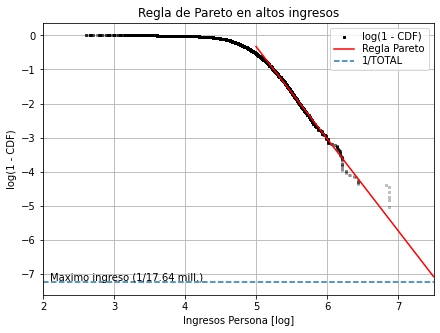

In [19]:
data['1 - CDF'] = data.P47T_persona.rank(pct = True, ascending = False)
data['log(1 - CDF)'] = np.log10(data['1 - CDF'])

fig, ax = plt.subplots(1, figsize = (7, 5))
ax.set_title('Regla de Pareto en altos ingresos')

## Points plot
plot_data = data.sample(frac = 0.1)
plot_data.plot(x = 'P47T_persona_log', y = 'log(1 - CDF)', ax = ax,
               lw = 0, marker = 's', c = 'k', alpha = .2, markersize = 2)


ax.axhline(np.log10(low_lim), linestyle = '--')
ax.annotate(xy = (2.1, np.log10(low_lim)), text = 'Maximo ingreso (1/17.64 mill.)', va = 'bottom', ha = 'left')
# ax.plot(x, y, '.', label = 'observations', c = '.3')

# Fit
fit_data = data.loc[data.P47T_persona_log > 5.2]
x_fit = fit_data['P47T_persona_log']
y_fit = fit_data['log(1 - CDF)']
z = np.polyfit(x_fit, y_fit, 1)
p = np.poly1d(z)
xp = np.linspace(5, 7.5, 2)
ax.plot(xp, p(xp), '-', c = 'r', label='%.2f x + %.2f' % tuple(z))

# # Leyenda
pts1 = mlines.Line2D([], [], lw = 0, marker = 's', c = 'k', markersize = 2, label = 'log(1 - CDF)')

'%.2f x + %.2f' % tuple(z)
line1 = mlines.Line2D([], [], color='r', label='Regla Pareto')
line2 = mlines.Line2D([], [], color='#1f77b4', linestyle = '--', label='1/TOTAL')
ax.legend(handles=[pts1, line1, line2], numpoints = 1, labelspacing = .2)

ax.set_ylabel('log(1 - CDF)')
ax.set_xlabel('Ingresos Persona [log]')
ax.set_xlim(2, 7.5)
plt.grid()
plt.show()

In [20]:
## Aplicar correccion para altos ingresos

# log(1 - CDF) segun regla de Pareto
data['T(log(1 - CDF))'] = np.log10(1 - np.arange(1, len(data) + 1)/(len(data) + .5))

## Usar inversa de regla de Pareto para obtener ingresos esperados segun CDF
a, b = p[1], p[0]
data['T(P47T_persona_log)'] = (data['T(log(1 - CDF))'] - b)/a

## Corregir ingresos [log] segun expectativa Pareto 
data['P47T_persona_log_fix'] = data['P47T_persona_log'] # Empezar por copiar valores
data.loc[data['log(1 - CDF)'] < -3, # Extremo milesima de mayor ingreso (< -3)
         'P47T_persona_log_fix',] = data.loc[data['log(1 - CDF)'] < -3, 'T(P47T_persona_log)']

## Pasar a escala lineal para tener ingresos corregidos nominales
data['P47T_persona_fix'] = np.power(10, data['P47T_persona_log_fix'])

## Volver a computar (1 - CDF)
data['1 - CDF'] = data.P47T_persona.rank(pct = True, ascending = False)
data['log(1 - CDF)'] = np.log10(data['1 - CDF'])

In [21]:
# data = df2021.reset_index()[['P47T_persona']]
# data = data.loc[data.P47T_persona > 0]
# data = data*(cpi_actual/cpi_ref)
# data = np.log10(data)

# plt.hist(data, bins = np.arange(1, 8, .1))
# plt.yscale('log')
# plt.show()

In [22]:
# data = df2021.reset_index()[['P47T_persona']]
# data = data.loc[data.P47T_persona > 0]
# data = data*(cpi_actual/cpi_ref)
# # pd.cut(data.P47T_persona, bins = np.arange(1, 8, .1))
# data['P47T_persona_log'] = np.log10(data['P47T_persona'])
# data['bin'] = pd.cut(data.P47T_persona_log, bins = np.arange(1, 8, .1))


In [23]:
# info = data.groupby('log_bin').agg(['mean', 'size', 'sum'])['P47T_persona']
# info.loc[:, ['size', 'sum']] = info[['size', 'sum']].div(info[['size', 'sum']].sum(), 1)
# info.sample(5)#.tail()

<ipython-input-24-5b71949394b8>:6: FutureWarning: ['cnt_bin', 'val_bin'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  info = data.groupby('log_bin').agg(['mean', 'size', 'sum'])['P47T_persona_fix']
<ipython-input-24-5b71949394b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info.loc[:, ['size', 'sum']] = info[['size', 'sum']].div(info[['size', 'sum']].sum(), 1)


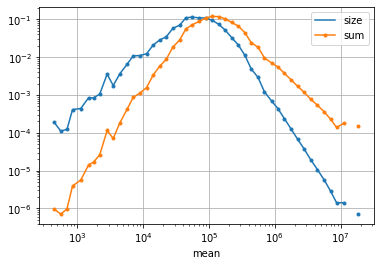

In [24]:
nb = 20
# data['cnt_bin'] = pd.qcut(data.P47T_persona, nb)
data['log_bin'] = pd.cut(data.P47T_persona_log_fix, bins = np.arange(2, 8, .1))
# data['val_bin'] = pd.cut(data.P47T_persona.cumsum(), bins = nb)

info = data.groupby('log_bin').agg(['mean', 'size', 'sum'])['P47T_persona_fix']
info.loc[:, ['size', 'sum']] = info[['size', 'sum']].div(info[['size', 'sum']].sum(), 1)

fig, ax = plt.subplots(1, figsize = (6, 4))
info.plot(x = 'mean', y = 'size', ax = ax, marker = '.')
info.plot(x = 'mean', y = 'sum', ax = ax, marker = '.')
ax.set_yscale('log')
# ax.set_ylim(1e-6, 1)
ax.grid()
ax.set_xscale('log')

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:

nb = 10
data['cnt_bin'] = pd.qcut(data.P47T_persona_fix, nb)
data['log_bin'] = pd.cut(data.P47T_persona_log_fix, bins = nb)
data['val_bin'] = pd.cut(data.P47T_persona_fix.cumsum(), bins = nb)

info = data.groupby('log_bin').agg(['mean', 'size', 'sum'])['P47T_persona_fix']
info.loc[:, ['size', 'sum']] = info[['size', 'sum']].div(info[['size', 'sum']].sum(), 1)

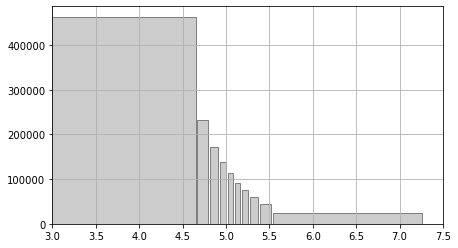

In [27]:
info = data.groupby('val_bin').agg({'P47T_persona_log_fix' : ['min', 'max', 'size']})['P47T_persona_log_fix']
info['min'] = info['min'].clip(2.9,)
info['mid'] = (info['max'] + info['min'])/2
info['width'] = (info['max'] - info['min'])

fig, ax = plt.subplots(1, figsize = (7, 4))

ax.bar(x = info['mid'], height = info['size'], width = info['width'] - .02, 
       color= '.8', linewidth = 1, edgecolor = '.5')
ax.grid()
ax.set_xlim(3, 7.5)
plt.show()

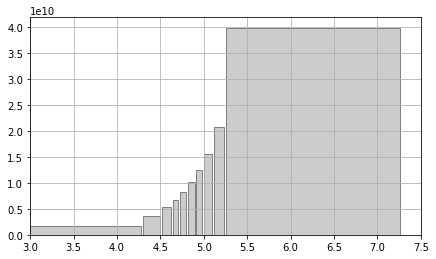

In [28]:
info = data.groupby('cnt_bin').agg({'P47T_persona_log_fix': ['min', 'max'],
                                    'P47T_persona_fix' : ['sum']})
info.columns = info.columns.droplevel(0)
info['min'] = info['min'].clip(2.9,)
info['mid'] = (info['max'] + info['min'])/2
info['width'] = (info['max'] - info['min'])

fig, ax = plt.subplots(1, figsize = (7, 4))

ax.bar(x = info['mid'], height = info['sum'], width = info['width'] - .02, 
       color= '.8', linewidth = 1, edgecolor = '.5')
ax.grid()
ax.set_xlim(3, 7.5)
plt.show()

In [29]:
# data.groupby('val_bin').agg({'P47T_persona_log': 'mean', 'P47T_persona': ['size', 'sum']})

In [30]:
3.173569e+10/1.272490e+09

24.939834497717076

In [31]:

# fig, ax = plt.subplots(1, figsize = (6, 5))

# plot_data = data.tail(120000)
# plot_data.plot(x = 'P47T_persona_log', y = 'log(1 - CDF)', lw = 0, marker = '.', ax = ax)
# plot_data.tail(2000).plot(x = 'P47T_persona_log_fix', y = 'log(1 - CDF)', lw = 0, marker = '.', ax = ax)

# ax.axhline(np.log10(low_lim), linestyle = '--')
# plt.grid()

# plt.show()

In [32]:
data_top = data.loc[data['1 - CDF'] < .1]

nb = 10
data_top['cnt_bin'] = pd.qcut(data_top.P47T_persona_fix, nb)
data_top['log_bin'] = pd.cut(data_top.P47T_persona_log_fix, bins = nb)
data_top['val_bin'] = pd.cut(data_top.P47T_persona_fix.cumsum(), bins = nb)


In [33]:
data_top.groupby('val_bin').agg({'P47T_persona_log_fix': 'mean', 'P47T_persona_fix': ['size', 'sum']})


P47T_persona_log_fix P47T_persona_fix  \
                                                   mean             size   
val_bin                                                                    
(-39676730.707, 3985349170.427]                5.260619            21865   
(3985349170.427, 7970523329.965]               5.294921            20201   
(7970523329.965, 11955697489.504]              5.327645            18733   
(11955697489.504, 15940871649.042]             5.367439            17094   
(15940871649.042, 19926045808.581]             5.409942            15500   
(19926045808.581, 23911219968.119]             5.457288            13896   
(23911219968.119, 27896394127.658]             5.513083            12216   
(27896394127.658, 31881568287.196]             5.589310            10244   
(31881568287.196, 35866742446.735]             5.711423             7697   
(35866742446.735, 39851916606.273]             5.986093             3731   

                                                  
                                             sum  
val_bin                                           
(-39676730.707, 3985349170.427]     3.985206e+09  
(3985349170.427, 7970523329.965]    3.985266e+09  
(7970523329.965, 11955697489.504]   3.985151e+09  
(11955697489.504, 15940871649.042]  3.985081e+09  
(15940871649.042, 19926045808.581]  3.985130e+09  
(19926045808.581, 23911219968.119]  3.985351e+09  
(23911219968.119, 27896394127.658]  3.984859e+09  
(27896394127.658, 31881568287.196]  3.985175e+09  
(31881568287.196, 35866742446.735]  3.985374e+09  
(35866742446.735, 39851916606.273]  3.985324e+09

In [34]:
data_top.groupby('cnt_bin').agg({'P47T_persona_log_fix': 'mean', 'P47T_persona_fix': ['size', 'sum']})


P47T_persona_log_fix P47T_persona_fix  \
                                                 mean             size   
cnt_bin                                                                  
(175010.88700000002, 183423.681]             5.255364            14118   
(183423.681, 193035.511]                     5.275308            14118   
(193035.511, 204886.661]                     5.301303            14117   
(204886.661, 219545.697]                     5.322239            14118   
(219545.697, 235331.559]                     5.354840            14118   
(235331.559, 255334.662]                     5.389153            14117   
(255334.662, 283008.315]                     5.426742            14118   
(283008.315, 323721.493]                     5.478850            14117   
(323721.493, 407620.202]                     5.554891            14118   
(407620.202, 18569062.175]                   5.766845            14118   

                                                
                                           sum  
cnt_bin                                         
(175010.88700000002, 183423.681]  2.541947e+09  
(183423.681, 193035.511]          2.661521e+09  
(193035.511, 204886.661]          2.825807e+09  
(204886.661, 219545.697]          2.965533e+09  
(219545.697, 235331.559]          3.196577e+09  
(235331.559, 255334.662]          3.459781e+09  
(255334.662, 283008.315]          3.773344e+09  
(283008.315, 323721.493]          4.255062e+09  
(323721.493, 407620.202]          5.076672e+09  
(407620.202, 18569062.175]        9.095674e+09

In [35]:
data['bin'] = pd.cut(data.P47T_persona_log_fix, bins = np.arange(1, 8, .1))
info = data.groupby('bin').agg(['mean', 'size', 'sum'])['P47T_persona_fix']
info[['size', 'sum']] = info[['size', 'sum']].div(info[['size', 'sum']].sum(), 1)
# info.sample(5)#.tail()

In [36]:
data['tot_log(1-CDF)'] = (-np.log10(data['1 - CDF']*frac*8))
data['top_group'] = pd.cut(data['tot_log(1-CDF)'], bins = np.arange(1, 9, 1), 
                           labels=['bottom 90%', 'top 10%', 'top 1%', 'top 0.1%', 'top 0.01%', 'top 0.001%', 'top 0.0001%'])

In [37]:
# (data['top_group'].value_counts()/8/frac).sort_index()

In [38]:
table = data.groupby('top_group').agg({'P47T_persona_fix': ['min', 'max', 'size', 'sum', 'mean']})['P47T_persona_fix']
table['size'] = table['size']/8/frac

for col in ['min', 'max', 'sum', 'mean']:
    magnitude = np.power(10, np.floor(np.log10(table[col])))
    table[col] = np.round(table[col]/magnitude, 3)*magnitude
    table[col] = table[col]/1e3

table.astype(int)
## Miles de pesos ARS

,min,max,size,sum,mean
top_group,,,,,
bottom 90%,0,159,15441312,78890000,63
top 10%,159,381,1985312,35280000,222
top 1%,381,889,198537,7957000,501
top 0.1%,889,2113,19850,1933000,1217
top 0.01%,2118,4975,1987,455600,2866
top 0.001%,5085,12360,200,112799,7048
top 0.0001%,18570,18570,12,18570,18570


In [39]:
## ARS total
## Million USD
# data['P47T_persona_fix'].sum()/8/frac/220/1e6  # Total income USD
data['P47T_persona_fix'].mean()#/220  # Mean income USD

88288.67706647878

In [40]:
## Cant total de personas (en AGLOS)
2256360/8/frac

# ## Cant total de personas que perciben ingreso (en AGLOS)
# 1411777/8/frac

28204500.0

In [41]:
(data['P47T_persona_fix'].mean())*(1411777/8/frac)/(2256360/8/frac)

55241.15107646041

In [42]:
# data['P47T_persona'].mean()/220  # Mean income USD

In [43]:
12/17000000

7.058823529411765e-07

In [44]:
table['size'].sum()

17647212.5

In [45]:
1235305/9*10

1372561.1111111112

In [46]:
# 1985312/9*100

In [47]:
## Cant total de personas que perciben ingreso (en AGLOS)

# 1411777/8/frac = 17647212.5

# Series de Tiempo. Hogares

In [48]:
# ## INDICE DE PRECIOS - CONVERSION A VALOR CONSTANTE

# cpi_M = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_M.csv', index_col=0)
# cpi_M.index = pd.to_datetime(cpi_M.index)

# from datetime import datetime as dt
  
# # Getting current date and time
# today = dt.today()
# ref = '2016-01'

# cpi_actual = cpi_M.loc[today.strftime("%Y-%m")]['index'][0]
# cpi_ref = cpi_M.loc[ref]['index'][0]

df_ARShoy = df*(cpi_actual/cpi_ref)

In [49]:
import matplotlib.ticker as mtick

# def moving_avg(table):
#     ## Label left. The roilling means are centered nearly on the right date, although one day early.
#     # i.e. 2009-12-31 is the average for 07-2009 to 06-2010
#     return table.resample('QS').mean().interpolate('linear').rolling(4, center = True).mean()


## Ingreso Total Familiar y Canastas. 

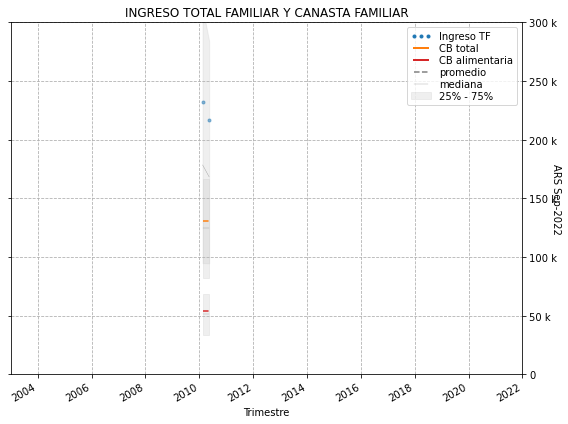

In [50]:
fig, ax = plt.subplots(1, figsize = (8, 6))

colors = ['#1f77b4', '#ff7f0e', '#d62728']

data = df_ARShoy
for i, v in enumerate(['P47T_hogar', 'CBT', 'CBA']):
    c = colors[i]
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    
    if v == 'P47T_hogar':
        moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
        data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
        
    else:
        data[v]['mean'].plot(ax =ax, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('INGRESO TOTAL FAMILIAR Y CANASTA FAMILIAR')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 3e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='Ingreso TF')
pts2 = mlines.Line2D([], [], color=colors[1], lw = 2, label='CB total')
pts3 = mlines.Line2D([], [], color=colors[2], lw = 2, label='CB alimentaria')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, pts3, meanLine, medianLine, grayPatch], numpoints = 3, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/ingreso1.png')
plt.show()

## Ingreso Per Capita Familiar y Canastas. 

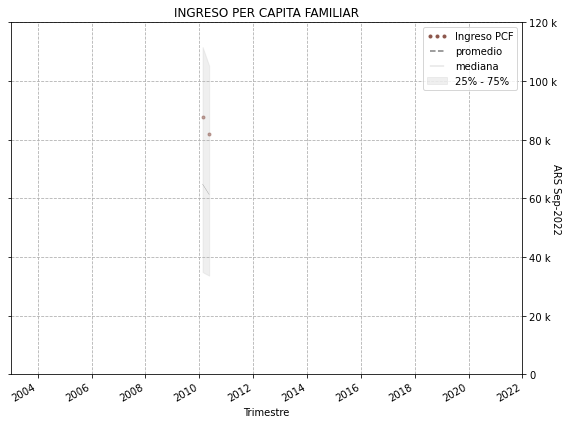

In [51]:
fig, ax = plt.subplots(1, figsize = (8, 6))

colors = ['#8c564b']

for i, (data, v) in enumerate([(df_ARShoy, 'IPCF')]):
    c = colors[i]
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
    data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('INGRESO PER CAPITA FAMILIAR')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.2e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='Ingreso PCF')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, meanLine, medianLine, grayPatch], numpoints = 3)

############
plt.tight_layout()
plt.savefig('./../images/ingreso2.png')
plt.show()

# Series de Tiempo. Hogares en Pobreza e Indigencia

In [53]:
# Stats Hogares en Pobreza e Indigencia

df_listP = []
df_listI = []
# for f in allFiles:
for f in allFiles[:2]:
    print(f)
    
    vars_ = ['Pobreza', 'Indigencia', 'P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IX_TOT']
    data = pd.read_csv(f, usecols = ['HOGAR_REF_ID', 'Q', 'AGLOMERADO'] + vars_)
    data = data.loc[data.AGLOMERADO != 0]
    data = data.drop_duplicates()
    data['IPCF'] = data['P47T_hogar']/data['IX_TOT']
    
    dataP = data.loc[data.Pobreza == True]
    tableP = dataP.groupby(['Q'])[mon_cols].agg(['mean', q10, q25, 'median', q75, q90])
    df_listP += [tableP]
    
    dataI = data.loc[data.Indigencia == True]
    tableI = dataI.groupby(['Q'])[mon_cols].agg(['mean', q10, q25, 'median', q75, q90])
    df_listI += [tableI]

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv


In [54]:
dfHpob = pd.concat(df_listP)
dfHind = pd.concat(df_listI)

dfHpob.index = pd.to_datetime(dfHpob.index)
dfHind.index = pd.to_datetime(dfHind.index)

dfHpob_ARShoy = dfHpob*(cpi_actual/cpi_ref)
dfHind_ARShoy = dfHind*(cpi_actual/cpi_ref)

## Brechas de Pobreza e Indigencia

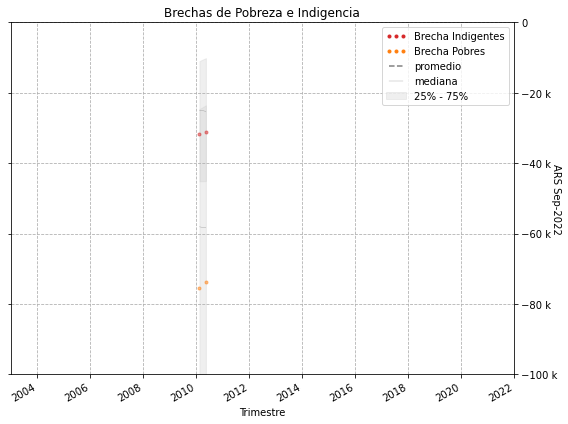

In [55]:
fig, ax = plt.subplots(1, figsize = (8, 6))

colors = ['#d62728', '#ff7f0e']

for i, (data, v) in enumerate([(dfHind_ARShoy, 'gap_indigencia'), (dfHpob_ARShoy, 'gap_pobreza')]):
    c = colors[i]
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
    data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('Brechas de Pobreza e Indigencia')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(-1e5, 0) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='Brecha Indigentes')
pts2 = mlines.Line2D([], [], marker = '.', color=colors[1], lw = 0, label='Brecha Pobres')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, meanLine, medianLine, grayPatch], numpoints = 3)

############
plt.tight_layout()
plt.savefig('./../images/ingreso3.png')
plt.show()

In [57]:
df_list2D = []

# for f in allFiles:
for f in allFiles[:2]:
    df_list = []
    
    print(f)
    cat_vars = ['Pobreza', 'Indigencia', 'CAT_OCUP', 'CAT_INAC', 'P02', 'INGRESO', 'INGRESO_JUB', 'Grupo_Etario_INDEC', 'PP07K']
    vars_ = ['P47T_persona']
    
    data = pd.read_csv(f, usecols = ['Q', 'AGLOMERADO'] + cat_vars + vars_)
    data = data.loc[data.AGLOMERADO != 0]
    
    for cat_v in cat_vars:
        table = data.groupby(['Q', cat_v])['P47T_persona'].agg(['mean', q10, q25, 'median', q75, q90])
        df_list += [table]
        
    df_list2D += [df_list]
    
dfs = np.array(df_list2D)

./../data/Pobreza/pobreza_0.01_q2010-02-15.csv
./../data/Pobreza/pobreza_0.01_q2010-05-15.csv


In [58]:
## Create tables for plotting next

for i, cat_v_tables in enumerate(list(dfs.T)):
    cat_var = cat_vars[i] 
    
    table = pd.concat(cat_v_tables)
    table = table.stack().unstack([-2, -1])
    table.index = pd.to_datetime(table.index)
    table = table*(cpi_actual/cpi_ref)
    
    globals()['table_' + cat_var] = table

## Personas con Ingreso

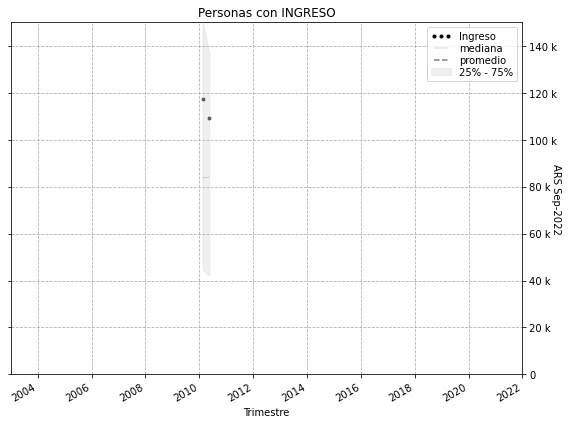

In [59]:
fig, ax = plt.subplots(1, figsize = (8, 6))

## INGRESO == 1
data = table_INGRESO; v = 1; ## Tabla y valor de la categoria en cuestion
c = 'k'
ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('Personas con INGRESO')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.5e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color='k', lw = 0, label='Ingreso')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, medianLine, meanLine, grayPatch], numpoints = 3, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/ingreso4.png')
plt.show()

## Personas con Ingreso. Grupos etarios y Jubilados.

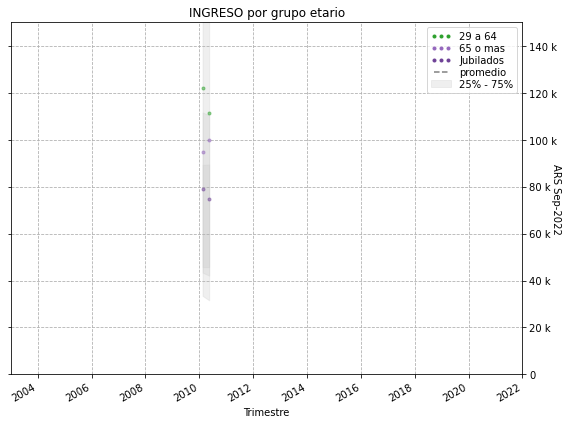

In [61]:
fig, ax = plt.subplots(1, figsize = (8, 6))

## GRUPOS ETARIOS
data = table_Grupo_Etario_INDEC; 

colors = ['#2ca02c', '#9467bd', '#6e4196']
for i, v in enumerate(['(29, 64]', '(64, 110]']):
    c = colors[i]
    
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
#     data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## CAT_INAC == JUBILADOS
data = table_CAT_INAC; v = 1; ## Tabla y valor de la categoria en cuestion
c = colors[2]
ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
# data[v]['median'].plot(ax =ax, color = c, lw = .3)
moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    
## Plot Format
ax.set_title('INGRESO por grupo etario')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.5e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='29 a 64')
pts2 = mlines.Line2D([], [], marker = '.', color=colors[1], lw = 0, label='65 o mas')
pts3 = mlines.Line2D([], [], marker = '.', color=colors[2], lw = 0, label='Jubilados')
# medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, pts3, meanLine, grayPatch], numpoints = 3, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/ingreso5.png')
plt.show()

## Ingresos por condicion de Pobreza / Indigencia

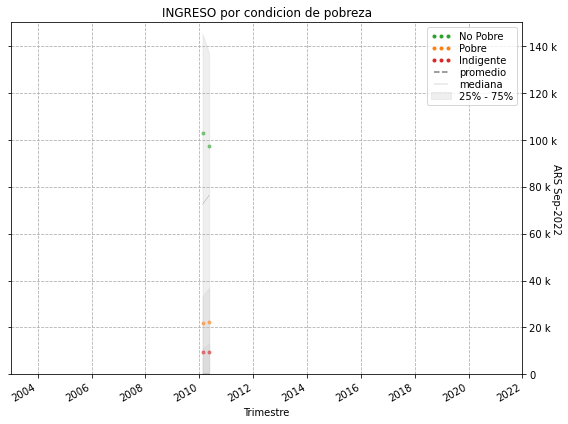

In [62]:
fig, ax = plt.subplots(1, figsize = (8, 6))

## CAT_INAC == JUBILADOS
colors = ['#2ca02c', '#ff7f0e', '#d62728']
for i, (data, v) in enumerate([(table_Pobreza, 0), (table_Pobreza, 1), (table_Indigencia, 1)]):
    c = colors[i]

    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    data[v]['mean'].plot(ax =ax, marker = '.', lw = 0, color = c, alpha = .5)
    data[v]['median'].plot(ax =ax, color = '.5', lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')

## Plot Format
ax.set_title('INGRESO por condicion de pobreza')
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.5e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='No Pobre')
pts2 = mlines.Line2D([], [], marker = '.', color=colors[1], lw = 0, label='Pobre')
pts3 = mlines.Line2D([], [], marker = '.', color=colors[2], lw = 0, label='Indigente')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, pts3, meanLine, medianLine, grayPatch], numpoints = 3, labelspacing = .2)

############
plt.tight_layout()
plt.savefig('./../images/ingreso6.png')
plt.show()

## Ingresos por genero

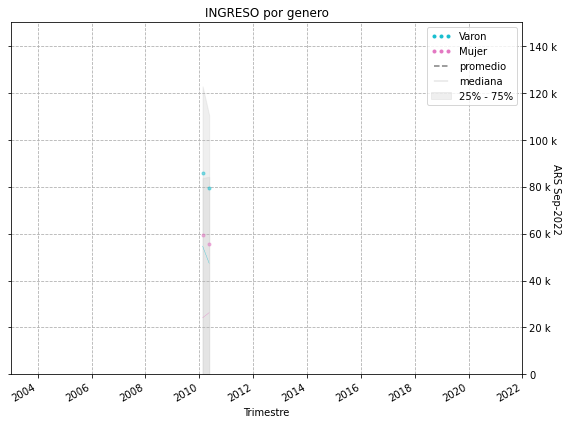

In [63]:
fig, ax = plt.subplots(1, figsize = (8, 6))

## GRUPOS ETARIOS
data = table_P02; 
colors = ['#17becf', '#e377c2']
for i, v in enumerate([1, 2]):
    c = colors[i]
    label = ['Varon', 'Mujer'][i]
    pts, = ax.plot(data[v]['mean'], marker = '.', lw = 0, color = c, alpha = .5, label = label)
    data[v]['median'].plot(ax =ax, color = c, lw = .3)
    moving_avg(data[v]['mean']).plot(ax = ax, lw = 1.5, color = c, linestyle = '--')
    ax.fill_between(x = data.index, y1 = data[v].q25, y2 = data[v].q75, color = '.8', alpha = .3)
    
## Plot Format
ax.set_title('INGRESO por genero') # Titulo
ax.grid(linestyle = '--') # Grid
# Limites
ax.set_xlim('2003', '2022') # Limites X
ax.set_ylim(0, 1.5e5) # Limites Y
# Formatos de ejes X, Y
ax.set_xlabel('Trimestre')  # Label X
ax.set_ylabel('ARS '+today.strftime("%b-%Y"), rotation=270)  # Label Y
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mtick.EngFormatter(unit=''))

# Leyenda
pts1 = mlines.Line2D([], [], marker = '.', color=colors[0], lw = 0, label='Varon')
pts2 = mlines.Line2D([], [], marker = '.', color=colors[1], lw = 0, label='Mujer')
medianLine = mlines.Line2D([], [], color='.5', lw = .3, label='mediana')
meanLine = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1.5, label='promedio')
grayPatch = mpatches.Patch(color='.8', alpha = .3, label='25% - 75%')

ax.legend(handles=[pts1, pts2, meanLine, medianLine, grayPatch], numpoints = 3)

############
plt.tight_layout()
plt.savefig('./../images/ingreso7.png')
plt.show()

In [ ]:
# ['P02', 'CAT_OCUP', 'CAT_INAC', 'INGRESO', 'Grupo_Etario_INDEC', 'PP07K', 'Pobreza', 'Indigencia'
# 'CBA', 'CBT', 'CB_EQUIV', 'P47T_persona', 'P47T_hogar', 'gap_pobreza', 'gap_indigencia']